In [3]:
#We will use the yfinance library to extract a stock data.
import yfinance as yf
import pandas as pd

We will use the `Ticker` module so we can create an object that will allow us to access functions to extract the data. 


To do this, we need to provide the ticker symbol for the stock,  
for example the company Apple and its ticker symbol is AAPL

In [65]:
apple = yf.Ticker("AAPL")
apple

yfinance.Ticker object <AAPL>

In [61]:
#Next, we will access functions and variables to extract the type of data that we need
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json"

#we will import the library requests to request the API
import requests
response = requests.get(url)

### Apple Stock Info

In [8]:
import json

In [62]:
#we will write the json file from the gotten response
with open("apple.json","wb") as json_file:
    json_file.write(response.content)

#and read the file to load the json code
with open("apple.json","r") as json_file:
    apple_info = json.load(json_file)
#we do this 2 step because we cannot get the json file directly
#when the response content is gotten


#make a dictionary table that will give more clear understanding
key = []
value = []
for i in apple_info:
    key.append(i)
    value.append(apple_info[i])

dfAppleInfo = pd.DataFrame({"Keywords":key, "Description":value})
dfAppleInfo

,Keywords,Description
0,zip,95014
1,sector,Technology
2,fullTimeEmployees,100000
3,longBusinessSummary,"Apple Inc. designs, manufactures, and markets ..."
4,city,Cupertino
...,...,...
147,bidSize,3200
148,dayHigh,179.61
149,regularMarketPrice,177.77
150,preMarketPrice,178.38


### Extracting Share Price

In [72]:
#A share is the single smallest part of a company stock that we can buy
#we can get it over a certain period of time by using .history method
applePrice = apple.history(period = "max")

applePrice.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0
1980-12-19 00:00:00-05:00,0.097335,0.097766,0.097335,0.097335,48630400,0.0,0.0
1980-12-22 00:00:00-05:00,0.102072,0.102504,0.102072,0.102072,37363200,0.0,0.0
1980-12-23 00:00:00-05:00,0.106380,0.106810,0.106380,0.106380,46950400,0.0,0.0
1980-12-24 00:00:00-05:00,0.111978,0.112409,0.111978,0.111978,48003200,0.0,0.0


In [73]:
#we can reset the index of the dataframe,
#so the date will become a value, not index anymore
applePrice.reset_index(inplace = True)
applePrice

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086998,0.086998,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
10975,2024-06-27 00:00:00-04:00,214.690002,215.740005,212.350006,214.100006,49772700,0.0,0.0
10976,2024-06-28 00:00:00-04:00,215.770004,216.070007,210.300003,210.619995,82542700,0.0,0.0
10977,2024-07-01 00:00:00-04:00,212.089996,217.509995,211.919998,216.750000,60402900,0.0,0.0
10978,2024-07-02 00:00:00-04:00,216.149994,220.380005,215.100006,220.270004,58046200,0.0,0.0


<Axes: xlabel='Date'>

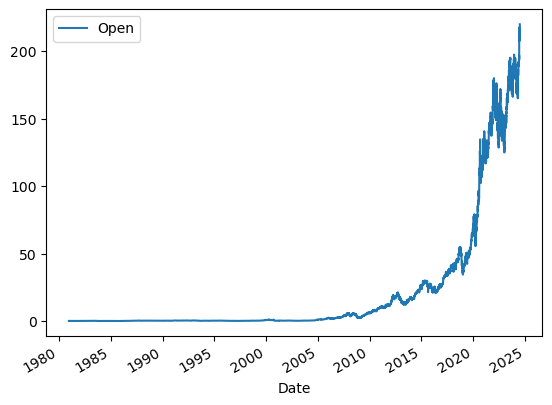

In [74]:
#Next, we will plot the open price based on the date
applePrice.plot(x="Date", y="Open")

### Extracting Dividents

In [78]:
#using the variabel dividends, we can get a dataframe of the data based on history function
dfDiv = pd.DataFrame(apple.dividends)
dfDiv.reset_index(inplace = True)
dfDiv

,Date,Dividends
0,1987-05-11 00:00:00-04:00,0.000536
1,1987-08-10 00:00:00-04:00,0.000536
2,1987-11-17 00:00:00-05:00,0.000714
3,1988-02-12 00:00:00-05:00,0.000714
4,1988-05-16 00:00:00-04:00,0.000714
...,...,...
78,2023-05-12 00:00:00-04:00,0.240000
79,2023-08-11 00:00:00-04:00,0.240000
80,2023-11-10 00:00:00-05:00,0.240000
81,2024-02-09 00:00:00-05:00,0.240000


<Axes: xlabel='Date'>

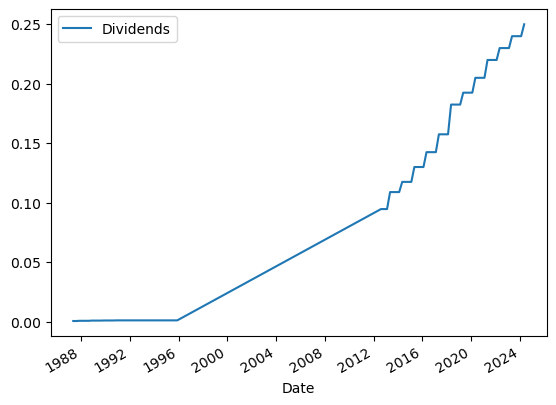

In [80]:
#next, we will plot it
dfDiv.plot(x = "Date", y = "Dividends")

# EXERCISE

In [82]:
#we will request for the data of amd based on the coursera API that containts json file
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json"

response = requests.get(url)

with open("amd.json","wb") as json_file:
    json_file.write(response.content)
    
with open("amd.json","r") as json_file:
    amdInfo = json.load(json_file)
    
amdInfo

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [83]:
#number 1. amd country
amdInfo['country']

'United States'

In [84]:
amdInfo['sector']

'Technology'

In [87]:
amd = yf.Ticker("AMD")

amd.history(period = "max")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17 00:00:00-05:00,0.000000,3.302083,3.125000,3.145833,219600,0.0,0.0
1980-03-18 00:00:00-05:00,0.000000,3.125000,2.937500,3.031250,727200,0.0,0.0
1980-03-19 00:00:00-05:00,0.000000,3.083333,3.020833,3.041667,295200,0.0,0.0
1980-03-20 00:00:00-05:00,0.000000,3.062500,3.010417,3.010417,159600,0.0,0.0
1980-03-21 00:00:00-05:00,0.000000,3.020833,2.906250,2.916667,130800,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-27 00:00:00-04:00,157.179993,160.610001,156.809998,159.470001,34018200,0.0,0.0
2024-06-28 00:00:00-04:00,160.229996,166.449997,159.410004,162.210007,56204600,0.0,0.0
2024-07-01 00:00:00-04:00,161.250000,161.509995,153.639999,157.690002,50436700,0.0,0.0
